**Áp dụng vào tập khách hàng.**\
**Bài toán:** phân khúc khách hàng để xác định những khách hàng mục tiêu với chương trình khuyến mãi nhằm tăng hoạt động mua hàng của họ.

In [ ]:
import pandas as pd

customers = pd.read_csv('data/customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Biểu đồ thu nhập và chi tiêu hằng năm.

Text(0, 0.5, 'Spending Score')

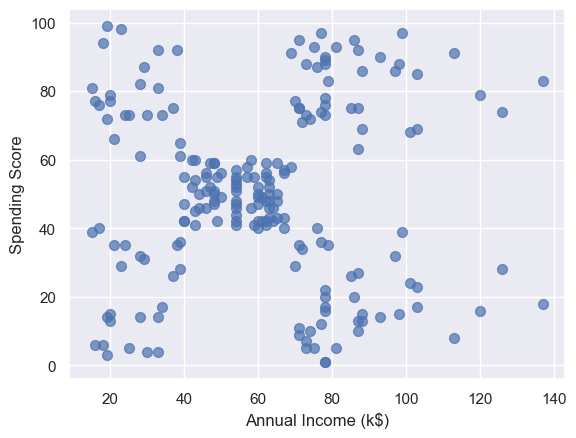

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

points = customers.iloc[:, 3:5].values
x = points[:, 0]
y = points[:, 1]

plt.scatter(x,y,s=50,alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

**Nhận xét:** Có vẻ như có 5 nhóm khách hàng ở đây.

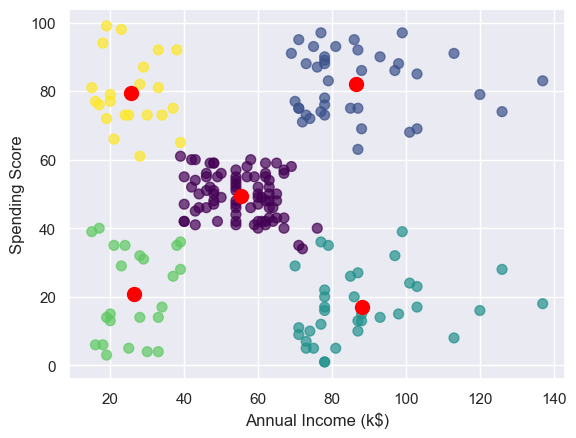

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

plt.scatter(x,y,c=predicted_cluster_indexes, s=50, alpha=0.7, cmap ='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=100)

In [ ]:
df = customers.copy()
df['Cluster'] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


**Xuất ra các khách hàng thuộc nhóm có thu nhập cao nhưng chi tiêu thấp**

In [ ]:
import numpy as np

# Get the cluster index for a customer with a high income and low spending score
cluster = kmeans.predict(np.array([[120, 20]]))[0]

# Filter the DataFrame to include only customers in that cluster
clustered_df = df[df['Cluster'] == cluster]

# Show the customer IDs
clustered_df['CustomerID'].values

array([125, 129, 131, 135, 137, 139, 141, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199])

**Mã hóa nhãn**

In [ ]:
from sklearn.preprocessing import LabelEncoder

df = customers.copy()
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


**Rút trích dữ liệu và áp dụng phương pháp khuỷu tay**

Text(0, 0.5, 'Inertia')

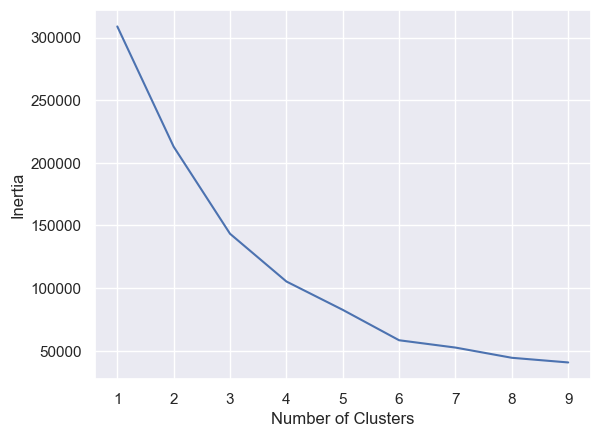

In [ ]:
points = df.iloc[:, 1:5].values
inertias = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)

df['Cluster'] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,0
3,4,0,23,16,77,2
4,5,0,31,17,40,0


In [ ]:
results = pd.DataFrame(columns = ['Cluster', 'Average Age', 'Average Income',
                                   'Average Spending Index', 'Number of Females',
                                   'Number of Males'])

for i, center in enumerate(kmeans.cluster_centers_):
    age = center[1]    # Average age for current cluster
    income = center[2] # Average income for current cluster
    spend = center[3]  # Average spending score for current cluster

    gdf = df[df['Cluster'] == i]
    females = gdf[gdf['Gender'] == 0].shape[0]
    males = gdf[gdf['Gender'] == 1].shape[0]

    results.loc[i] = ([i, age, income, spend, females, males])

results.head()

,Cluster,Average Age,Average Income,Average Spending Index,Number of Females,Number of Males
0,0.0,54.060000,40.460000,36.720000,28.0,22.0
1,1.0,32.692308,86.538462,82.128205,21.0,18.0
2,2.0,25.250000,25.833333,76.916667,14.0,10.0
3,3.0,41.647059,88.735294,16.764706,15.0,19.0
4,4.0,33.396226,58.056604,48.773585,34.0,19.0
